# Classification Demo: k-NN Classification
The purpose of this demo is to demonstrate the ease and utility of performing classification. Although there are many classifiers (many of which are intimately related with similarly-named regressions) one of the most used and easiest to understand classifiers is **k-Nearest Neighbors**. Basically, each sample of training data is a labeled point in a high dimensional space, and when test data comes in you simply poll the k nearest neighbors to that unlabeled point to determine which class it belongs to.

In this example, we will generate data that belongs to three different sources. We will then train the classifier using a subset of the data, and test the classifier on a separate set.

## Demo Instructions:

Perform the following steps:
1. Create a function that generates features depending on a label being either 'A', 'B', or 'C'. Assume n is the (0,1) normal distribution. 
    * A: (x,y) = (1+n, 3+n)  
    * B: (x,y) = (3+n, 5+n)
    * C: (x,y) = (5+n,1+n)
2. Generate two samples with equal numbers in each class. 
    * A training set of 30 samples 
    * A test set of 150 samples 
3. Create a k-NN classifier with the following values of k: 
    * k = 1 
    * k = 3 
    * k = 5 
4. Create a scatter plot showing the training data with the labels as different colors and include a legend. </li>
5. Apply each of the 3 classifiers to predict the class in the test set. Find the overall accuracy, average recall, and average precision. Also, create the confusion matrix showing the mistakes. 

# Solutions:

## 1. Create a function that generates features depending on a label being either ‘A’, ‘B’, or ‘C’. Assume n is the (0,1) normal distribution
* A: (x,y) = (1 + n, 3 + n)
* B: (x,y) = (3 + n, 5 + n)
* C: (x,y) = (5 + n, 1 + n)

In [1]:
# Clear your environment.
rm (list = ls())

# Create a function.
mydff <- function(n){
  n<-n/3
  x1 <- 1 + rnorm(n)
  y1 <- 3 + rnorm(n)
  
  x2 <- 3 + rnorm(n)
  y2 <- 5 + rnorm(n)
  
  x3 <- 5 + rnorm(n)
  y3 <- 1 + rnorm(n)
  
  myclass <- rep(c("A", "B", "C"), c(n,n,n))

  df <- data.frame(class = myclass, x = c(x1,x2,x3), y = c(y1,y2,y3))
  df

  return(df)
}

## 2. Generate two samples with equal numbers in each class.
* A training set of 30 samples total.
* A test set of 150 samples.

In [11]:
train = mydff(30)
test = mydff(150)
print(train)

   class          x          y
1      A  3.5368976  2.5286132
2      A -0.1811440  3.8504628
3      A  2.0544512  2.3580510
4      A  0.6340556  4.0570849
5      A  2.2504584  3.2785865
6      A -0.4741697  3.6819708
7      A  0.7515487  5.2905890
8      A  2.7076735  3.4781797
9      A  0.5682317  0.9423722
10     A  1.2760549  3.2719254
11     B  3.5409419  4.2530943
12     B  2.1667822  4.3911985
13     B  4.5263636  4.6032551
14     B  3.1314597  4.0194947
15     B  3.2635104  3.8395266
16     B  3.1304679  5.3949809
17     B  4.6653746  4.6107544
18     B  4.2687530  5.4921730
19     B  3.2298841  5.5721854
20     B  2.9678099  4.6417115
21     C  5.4663490  1.5831446
22     C  4.5170493  1.3665043
23     C  7.5063799  0.8952213
24     C  5.8745110  1.1109163
25     C  5.4192470 -0.3000073
26     C  5.2181399  1.5797369
27     C  5.9176737  1.9800476
28     C  4.9722219  2.2567807
29     C  5.8462501  0.4697869
30     C  4.1603255  1.3895859


## 3. Create a k-NN classifier with the following values of k
* K = 1
* K = 3
* K = 9 (optional)

In [12]:
library(class)
knn.1 <- knn(train[,2:3], test[,2:3], train[,1], k=1)
knn.3 <- knn(train[,2:3], test[,2:3], train[,1], k=3)
knn.9 <- knn(train[,2:3], test[,2:3], train[,1], k=9)
knn.1

[1] A A A A A A A A A A A A A A A A B A A A A A A A A A A A A B A A A A A A A
 [38] A A A A A A A B A B A A A B B B B A B B A B B B B A B B B A B B B B B B A
 [75] B B B B B B B B A B B A B B B A B B B B B A B B B B C C C C C C C C C C C
[112] C C C C C C C C A C C C A C C C C C C C C C C C C C C C C C C C C C C C C
[149] C C
Levels: A B C

## 4. Create a scatter plot showing the training data with the labels as different colors and include a legend.

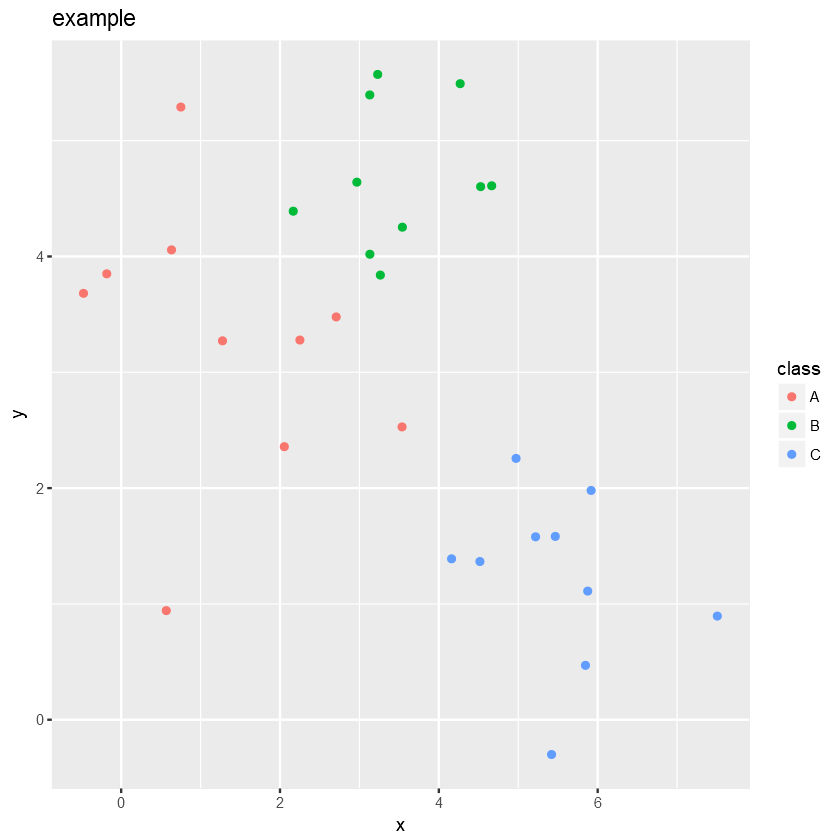

In [18]:
library(ggplot2)
ggplot(train, aes(x=x,y=y,col=class)) + geom_point() + ggtitle("example")

## 5. Apply each of the 3 classifiers to predict the class in the test set. Find the overall accuracy, average recall, and average precision. Also, create the confusion matrix showing the mistakes (The expectation is that k=3 will perform best, but this is not guaranteed)

In [14]:
# Accuracy

acc  <- data.frame(matrix(0, ncol = 1, nrow = 3))
names(acc) <- c("Accuracy")
rownames(acc) <- c("knn.1 ", "knn.3 ", "knn.9 ")
acc[1,1] <- 100 * sum(test$class == knn.1)/150
acc[2,1] <- 100 * sum(test$class == knn.3)/150
acc[3,1] <- 100 * sum(test$class == knn.9)/150
acc

,Accuracy
knn.1,90.00000
knn.3,91.33333
knn.9,92.00000


In [15]:
# Precision of each K-NN classifier
my_p_and_r_f <- function(k) {
  correct_A <- 0 
  correct_B <- 0 
  correct_C <- 0 
  for (i in 1:50) # check the first 50 to see if they are A
  {
    if (k[i] == "A")
      correct_A <- correct_A +1
  }
  for (i in 51:100) # check 51-100 to see if they are B
  {
    if (k[i] == "B")
      correct_B <- correct_B +1
  }

  for (i in 101:150) # check 101-150 to see if they are C 
  {
    if (k[i] == "C")
      correct_C <- correct_C +1
  }
  
  num_A <- 0 # set an initial value of zero
  num_B <- 0 
  num_C <- 0
  for (i in 1:150) # find the raw count of A, B and C
  {
    if (k[i] =="A")
      num_A <- num_A +1
    else if (k[i] =="B")
      num_B <- num_B +1
    else if (k[i] =="C")
      num_C <- num_C +1
  }
  avg <- ((correct_A / num_A) + (correct_B / num_B) + (correct_C / num_C))/3
  recall_var <- ((correct_A / 50) + (correct_B / 50) + (correct_C / 50))/3
  pr_df <- c((correct_A / num_A), (correct_B / num_B), 
             (correct_C / num_C), avg, recall_var)
  
  return (pr_df)
} 
# End of precision and recall function


# Call the new precision function to calculate the precision of each K-NN classifier

# Set up the name of columns of the precision data frame

pf  <- data.frame(matrix(0, ncol = 5, nrow = 3))
names(pf) <- c("Precision of A", "Precision of B", "Precision of C", "Avg Precision", "Avg Recall")
rownames(pf) <- c("knn.1 ", "knn.3 ", "knn.9 ")

# Fill the new data frame with precision values for A, B and C,
print(knn.9)
pf[1,] <- my_p_and_r_f(knn.1)
pf[2,] <- my_p_and_r_f(knn.3)
pf[3,] <- my_p_and_r_f(knn.9)
pf

  [1] A A A A A A A A A A A A A A C B B A A A A A A A A A A A A A A A A A A A A
 [38] A A A A A A A A A A A A B B B B B B B B B B B B B A B B B A B B B B B B A
 [75] B B B B B B B B A B B A B B B A B B B B B A B B B B C C C C C C C C C C C
[112] C C C C C C C C A C C C C C C C C C C C C C C C C C C C C C C C C C C C C
[149] C C
Levels: A B C


,Precision of A,Precision of B,Precision of C,Avg Precision,Avg Recall
knn.1,0.8070175,0.9111111,1.00,0.9060429,0.9000000
knn.3,0.8135593,0.9523810,1.00,0.9219801,0.9133333
knn.9,0.8518519,0.9347826,0.98,0.9222115,0.9200000


In [16]:
# Confusion Matrix
install.packages("caret")
library(caret)

install.packages('e1071', dependencies=TRUE)



cm1 <- confusionMatrix(knn.1, test$class, positive = NULL, dnn = c("Prediction", "Reference"))
cm2 <- confusionMatrix(knn.3, test$class, positive = NULL, dnn = c("Prediction", "Reference"))
cm3 <- confusionMatrix(knn.9, test$class, positive = NULL, dnn = c("Prediction", "Reference"))

cm1
cm2
cm3

Installing package into 'C:/Users/ian_c/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'caret' is in use and will not be installed"Installing package into 'C:/Users/ian_c/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'e1071' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'e1071'"


The downloaded binary packages are in
	C:\Users\ian_c\AppData\Local\Temp\RtmpQdxH2s\downloaded_packages


Confusion Matrix and Statistics

          Reference
Prediction  A  B  C
         A 46  9  2
         B  4 41  0
         C  0  0 48

Overall Statistics
                                          
               Accuracy : 0.9             
                 95% CI : (0.8404, 0.9429)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.85            
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C
Sensitivity            0.9200   0.8200   0.9600
Specificity            0.8900   0.9600   1.0000
Pos Pred Value         0.8070   0.9111   1.0000
Neg Pred Value         0.9570   0.9143   0.9804
Prevalence             0.3333   0.3333   0.3333
Detection Rate         0.3067   0.2733   0.3200
Detection Prevalence   0.3800   0.3000   0.3200
Balanced Accuracy      0.9050   0.8900   0.9800

Confusion Matrix and Statistics

          Reference
Prediction  A  B  C
         A 48 10  1
         B  2 40  0
         C  0  0 49

Overall Statistics
                                         
               Accuracy : 0.9133         
                 95% CI : (0.8564, 0.953)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.87           
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: A Class: B Class: C
Sensitivity            0.9600   0.8000   0.9800
Specificity            0.8900   0.9800   1.0000
Pos Pred Value         0.8136   0.9524   1.0000
Neg Pred Value         0.9780   0.9074   0.9901
Prevalence             0.3333   0.3333   0.3333
Detection Rate         0.3200   0.2667   0.3267
Detection Prevalence   0.3933   0.2800   0.3267
Balanced Accuracy      0.9250   0.8900   0.9900

Confusion Matrix and Statistics

          Reference
Prediction  A  B  C
         A 46  7  1
         B  3 43  0
         C  1  0 49

Overall Statistics
                                         
               Accuracy : 0.92           
                 95% CI : (0.8644, 0.958)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.88           
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: A Class: B Class: C
Sensitivity            0.9200   0.8600   0.9800
Specificity            0.9200   0.9700   0.9900
Pos Pred Value         0.8519   0.9348   0.9800
Neg Pred Value         0.9583   0.9327   0.9900
Prevalence             0.3333   0.3333   0.3333
Detection Rate         0.3067   0.2867   0.3267
Detection Prevalence   0.3600   0.3067   0.3333
Balanced Accuracy      0.9200   0.9150   0.9850